# Chapter 04 분류(1st)
P.183

## 01.분류(Classification) 개요
P.183

지도학습 : 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

지도학습 > __분류(Classification)__ : 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 `학습`해 `모델을 생성`하고, 이렇게 생성된 모델에 새로운 데이터 값이 주어졌을 때 `미지의 레이블 값을 예측`하는 것

* 나이브 베이즈(Naive Bayes)
* 로지스틱 회귀(Logistic Regression)
* __결정 트리(Decision Tree)__
* 서포트 벡터 머신(Support Vector Machine)
* 최소 근접(Nearest Neighbor) 알고리즘
* 신경망(Neural Network)
* __앙상블(Ensemble)☆☆☆__

앙상블 : 서로 다른/또는 같은 머신러닝 알고리즘을 결합

* 배깅(Bagging)
    * 랜덤 포레스트(Random Forest) → 전통적인 기법
    
    
* __부스팅(Boostiong)__
    * 그래디언트 부스팅(Gradient Boosting) → 전통적인 기법
    * __XGBoost(eXtra Gradient Boost)__ → 최신 기법
    * __LightGBM__ → 최신 기법
    
    
* 스태킹(Stacking) 기법

결정 트리 : 앙상블의 기본 알고리즘으로 사용

* 장점 - 매우 쉽고 유연하게 적용될 수 있는 알고리즘. 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적음.

* 단점 - 예측 성능을 향상시키기 위해 복잡한 규칙 구조, 과적합(overfitting)
    * But 앙상블은 `매우 많은 여러개의 약한 학습기`(즉, 예측 성능이 상대적으로 떨어지는 학습 알고리즘)를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트하면서 예측 성능을 향상시킨다. 이때, __결정 트리가 좋은 약한 학습기__가 된다.

## 02.결정 트리
P.185

결정 트리(Decision Tree) : 데이터에 있는 규칙을 학습을 통해 자동으로 찾아낸 트리(Tree) 기반의 분류 규칙(if/else)을 만드는 것

→ 데이터의 어떤 기준을 바탕으로 규칙을 만드는 지가 관건

* 규칙 노드(Decision Node) : 규칙 조건
* 리프 노드(Leaf Node) : 결정된 클래스 값
* 서브 트리(Sub Tree) : 새로운 규칙 조건마다 생성됨

<img src="그림1_결정트리.png" width=900>

많은 규칙이 있다 → 복잡해진다 → 과적합

즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음

∴ 최대한 __균일한__ 데이터 세트를 구성할 수 있도록 분할하는 것이 필요 <br>
(균일도가 높은 데이터 세트 = 데이터 세트에서 하나의 데이터를 뽑았을 때 데이터에 대한 별다른 정보 없이도 데이터를 쉽게 예측할 수 있는 데이터 세트)

결정 노드는 __정보 균일도가 높은 데이터 세트를 먼저 선택__할 수 있도록 규칙 조건을 만든다.
    
    정보 균일도가 높은 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식을 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측하게 된다.

정보의 균일도를 측정하는 방법
* __정보 이득__
    * 엔트로피(혼잡도)
    * 1 - 엔트로피
    * 정보 이득이 `높은` 속성을 기준으로 분할
    
* __지니 계수__
    * 불평등 지수
    * 0이 가장 평등, 1로 갈수록 불평등
    * 지니 계수가 `낮은` 속성을 기준으로 분할

※ DecisionTreeClassifier : 지니 계수를 이용해 데이터 세트를 분할

결정 트리의 일반적인 알고리즘
<ol>
    <li>데이터 균일도가 높은(정보 이득이 높은/지니 계수가 낮은) 조건 찾기</li>
    <li>자식 트리 노드에 걸쳐 반복적으로 분할</li>
    <li>데이터가 모두 특정 분류에 속함</li>
    <li>분할을 멈추고 분류를 결정</li>
</ol>

### 결정 트리 모델의 특징
P.187

* 장점
    * '균일도' → 쉽고 직관적
    * 전처리 작업이 필요 없음 (특별한 경우 제외)


* 단점
    * 과적합으로 정확도가 떨어짐 → 트리의 크기를 사전에 제한하는 튜닝 필요

### 결정 트리 파라미터
P.188

`DecisionTreeClassifier` 분류를 위한 클래스

`DecisionTreeRegressor` 회귀를 위한 클래스

<br>

파라미터 (클래스 공통)  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* __min_samples_split__
    * 노드를 분할하기 위한 최소한의 샘플 데이터 수
    * Default `2`
    * 작게 설정할수록 과적합 가능성 증가
* __min_samples_leaf__
    * 리프 노드가 되기 위한 최소한의 샘플 데이터 수
    * Default `1`
    * 비대칭적(imbalanced) 데이터의 경우 작게 설정 필요
* __max_features__
    * 최적의 분할을 위해 고려할 최대 피처 개수
    * Default `None` (모든 피처 사용)
    * int 형 : 대상 피처의 개수 / float 형 : 전체 피처 중 대상 피처의 퍼센트
    * 'sqrt'('auto') : $\sqrt{전체 피처 개수}$
    * 'log' : $log_2(전체 피처 개수)$
    * 'None' : 전체 피처 선정
* __max_depth__
    * 트리의 최대 깊이를 규정
    * Default `None` (①완벽하게 클래스 결정 값이 될 때까지 ②min_samples_split보다 작아질 때까지)
* __max_leaf_nodes__
    * 리프 노드의 최대 개수
    * Default `None`

### 결정 트리 모델의 시각화
P.189

Graphviz 패키지 https://www.graphviz.org  ( https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/ )

sklearn.tree `export_graphviz()` dot 파일

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)


# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)


# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

`export_graphviz(학습이 완료된 estimator, output 파일명, class_names=, feature_names=)`

In [2]:
from sklearn.tree import export_graphviz


# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names, impurity=True, filled=True)

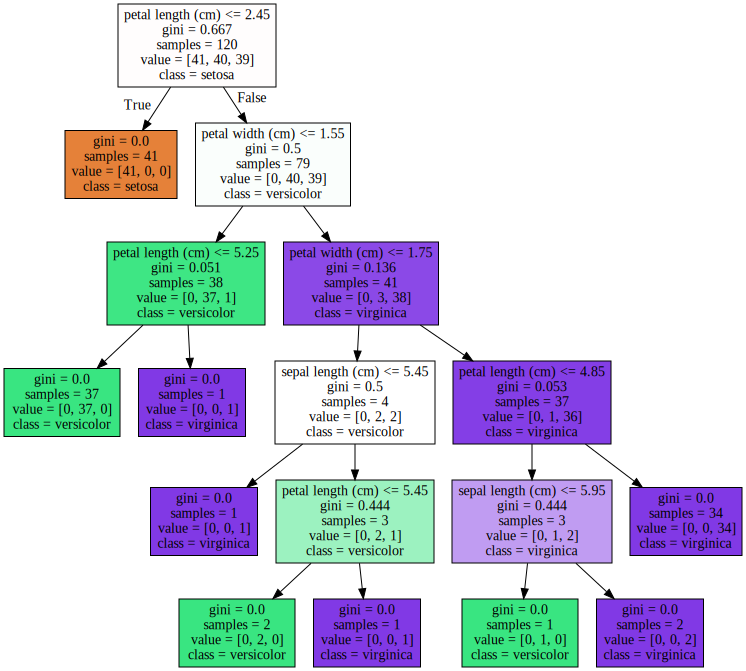

In [3]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

자식 노드가 없는 노드 → 리프 노드 <br>
자식 노드가 있는 노드 → 브랜치 노드

+ 각 노드의 색깔은 붓꽃 데이터의 레이블 값 의미
+ 색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미

`dt_clf.feature_importances_` 피처의 중요도
* ndarray 형태로 반환
* 피처 순서대로 값이 할당
* 값이 높을수록 해당 피처의 중요도가 높다는 의미

`zip()`

`sns.barplot()`

Feature importances:
[0.025 0.    0.555 0.42 ]

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<AxesSubplot:>

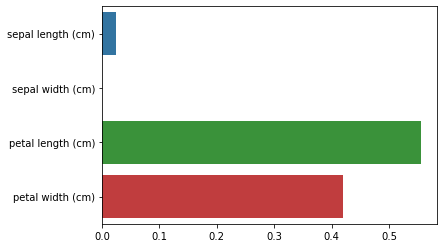

In [4]:
import seaborn as sns
import numpy as np
%matplotlib inline


# feature importance 추출
print("Feature importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))


# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

    
# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정 트리 과적합(Overfitting)
P.199

`make_classification()` 분류를 위한 테스트용 데이터 만드는 함수

`plt.scatter()` https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
* marker : 점 모양. Default 'o'
* c : 색 분류 기준. Default None
* s : 점 크기
* edgecolor : 점 테두리. Default 'face'

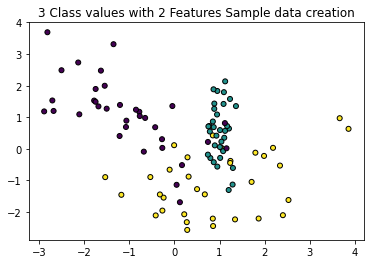

In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline


plt.title("3 Class values with 2 Features Sample data creation")


# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3, n_clusters_per_class=1, random_state=0)


# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [6]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

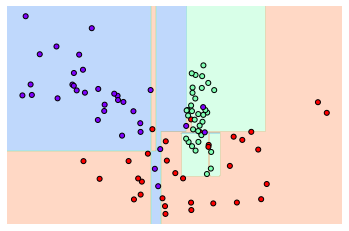

In [7]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치(Outlier) 데이터로 인해 과적합(Overfitting)

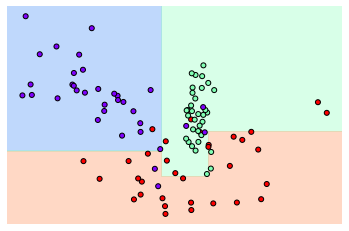

In [8]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트
P.201 <br>
http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

사용자 행동 인식 데이터 세트 : 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터

`DataFrame.values.tolist()` values로 얻은 ndarray에 tolist() 호출. (DataFrame을 리스트로) → Ch.1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])


# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [10]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


`DF.cumcount()` 누적 횟수 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.cumcount.html

`pd.merge()` 병합 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge
* how{‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default 'inner'. Type of merge to be performed.

In [11]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                              if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [12]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_features_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체를 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 변환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [13]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [14]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))


# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


`GridSearchCV()` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* __verbose__ : _int_.  log 출력의 level을 조정 (숫자가 클 수록 많은 log 출력) 
    * 1 : the computation time for each fold and parameter candidate is displayed
    * 2 : the score is also displayed
    * 3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
* __n_jobs__ : _int, default=None(1)_. Number of jobs to run in parallel.
    * -1 : 모든 CPU 코어를 이용해 학습

In [16]:
from sklearn.model_selection import GridSearchCV


params = {
    'max_depth':[6,8,10,12,16,20,24]
}


grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   48.5s finished


GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


`grid_cv.cv_results_` → P.116

In [17]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성.
cv_results_df = pd.DataFrame(grid_cv.cv_results_)


# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [18]:
max_depths = [6,8,10,12,16,20,24]

# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


In [19]:
params = {
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}


grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   44.1s finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [20]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


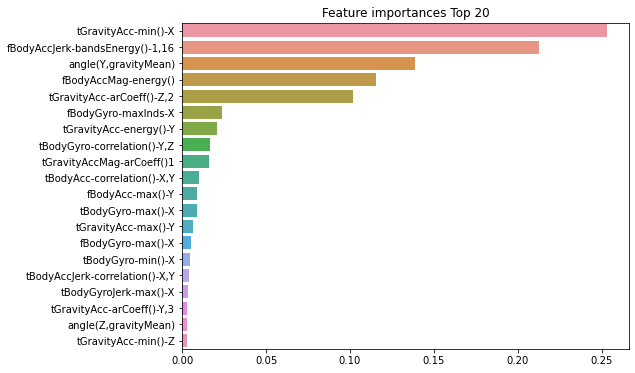

In [21]:
import seaborn as sns


ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 03.앙상블 학습
P.211

### 앙상블 학습 개요
P.211

__앙상블 학습(Ensemble Learning)__ : 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법.

* __보팅(Voting)__
> 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 서로 다른 알고리즘을 가진 분류기를 결합.

* __배깅(Bagging)__
> 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식. 같은 알고리즘을 가진 분류기를 결합. 데이터 샘플링을 서로 다르게 가짐. 부트스트래핑(Bootstrapping) 분할 방식 (__중복 허용__) <br>
e.g. 랜덤 포레스트

* __부스팅(Boosting)__
> 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞으로 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에서는 __가중치(weight)__를 부여하면서 학습과 예측을 진행하는 것. <br>
e.g. 그래디언트 부스트, XGBoost, LightGBM

* __스태킹(Stacking)__
> 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법.

### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)
P.213

* 하드 보팅(Hard Voting) : 다수의 분류기가 결정한 예측값


* 소프트 보팅(Soft Voting) : 분류기들의 레이블 값 결정 확률의 평균 중 가장 높은 레이블 값 → 소프트 보팅을 주로 사용

### 보팅 분류기(Voting Classifier)
P.214

`VotingClassifier` 보팅 방식의 앙상블 구현

In [22]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


`VotingClassifier(estimators=, voting=)`
* estimators : 리스트 값으로 Classifier 객체들을 튜플 형식으로 입력받음
* voting : _Default='hard'_

In [23]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)


# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)


# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))


# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


_※ 보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지는 않음_

<br>

보팅과 스태킹 → 서로 다른 알고리즘 기반

배깅과 부스팅 → 대부분 결정 트리 알고리즘 기반

    수십~수천 개의 매우 많은 분류기를 결합해 다양한 상황을 학습 (결정 트리 알고리즘의 단점 이용)

## 04.랜덤 포레스트
P.217

### 랜덤 포레스트의 개요 및 실습
P.217

__배깅(bagging)__ :  같은 알고리즘으로 여러 개의 분류기를 만들어서 (소프트)보팅으로 최종 결정하는 알고리즘

배깅 > __랜덤 포레스트__ : 빠른 수행 속도. 높은 예측 성능. 결정 트리 기반

* 학습하는 데이터 세트는 전체 데이터에서 일부가 **중첩**되게 샘플링된 데이터 세트 → **부트스트랩핑(bootstrapping) 분할 방식**

`RandomForestClassifier` 사이킷런 랜덤 포레스트 기반의 분류 지원

`warnings`

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()


# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


### 랜덤 포레스트 하이퍼 파라미터 및 튜닝
P.219

랜덤 포레스트 하이퍼 파라미터
* __n_estimators__ : 결정 트리의 개수 지정. _default 10_
* __max_features__ : _default 'auto'('sqrt')_
* __max_depth, min_samples_leaf, ...__

<br>

__CPU 병렬 처리__로 빠른 학습이 가능함

    n_jobs = -1 : 모든 CPU 코어를 이용해 학습

In [25]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)


print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9180


In [26]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9165


`feature_importances_`

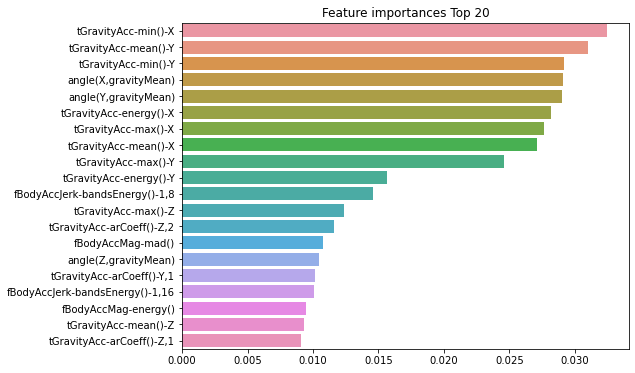

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]


plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

## 05.GBM(Gradient Boosting Machine)
P.222

### GBM의 개요 및 실습
P.222

**부스팅** : 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 __가중치__ 부여를 통해 오류를 걔선해 나가면서 학습하는 방식.
* 에이다 부스트(AdaBoost, Adaptive Boosting) : 오류 데이터에 가중치를 부여.
* __그래디언트 부스트(GBM, Gradient Boosting Machine)__ : 경사 하강법(Gradient Descent)을 이용해 가중치 업데이트.
    * __경사 하강법__ : 오류식 $ h(x) = y - F(x) $를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트하는 것 → P.294

`GradientBoostingClassifier` 사이킷런 GBM 기반의 분류

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')


X_train, X_test, y_train, y_test = get_human_dataset()


# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()


gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)


print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간: {0:.1f}초'.format(time.time() - start_time))

GBM 정확도: 0.9389
GBM 수행 시간: 990.5초


GBM이 랜덤 포레스트보다 예측 성능이 조금 뛰어난 경우가 많음

__but__

수행 시간이 오래 걸리고, 하이퍼 파라미터 튜닝 노력도 더 필요

※ 랜덤 포레스트와 달리 CPU 병렬 처리가 지원되지 않음<br>
(랜덤 포레스트가 예측 성능이 떨어지더라도 사용되는 이유)

### GBM 하이퍼 파라미터 및 튜닝
P.225

GBM 하이퍼 파라미터
* __loss__ : 경사 하강법에서 사용할 비용 함수. _default 'deviance'_
* __learning_rate__ : GBM이 학습을 진행할 때마다 적용하는 학습률. 0~1 사이의 값. _default 0.1_
    * 너무 작은 값 → 최소 오류 값을 찾아 예측 성능이 높아질 가능성↑ but 오랜 수행
    * 너무 큰 값 → 최소 오류 값을 찾지 못하고 예측 성능이 떨어질 가능성↑ but 빠른 수행
    * __learning_rate ↓ + n_estimators ↑__
* __n_estimators__ : weak learner의 개수. _default 100_
* __subsample__ : weak learner가 학습에 사용하는 데이터의 샘플링 비율. _default 1 (전체 학습 데이터를 기반으로 학습)_

In [29]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators':[100, 500],
    'learning_rate':[0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 14.4min remaining: 43.3min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 72.3min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도: 0.9011


In [30]:
# GridSearchCV를 이용해 최적으로 학습된 estimator로 예측 수행.
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.9420


과적합에도 강한 뛰어난 예측 성능

_but 수행 시간이 오래 걸린다..._